# Importing Data

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
#Import 6 months of data

jan = pd.read_csv("../raw_data/yellow_tripdata_2018-01.csv")
feb = pd.read_csv("../raw_data/yellow_tripdata_2018-02.csv")
mar = pd.read_csv("../raw_data/yellow_tripdata_2018-03.csv")
apr = pd.read_csv("../raw_data/yellow_tripdata_2018-04.csv")
may = pd.read_csv("../raw_data/yellow_tripdata_2018-05.csv")
jun = pd.read_csv("../raw_data/yellow_tripdata_2018-06.csv")



In [2]:
#appending the data 
df = jan.append(feb, ignore_index=True)
df = df.append(mar, ignore_index=True)
df = df.append(apr, ignore_index=True)
df = df.append(may, ignore_index=True)
df = df.append(jun, ignore_index=True)


# Removing records going against our assumptions

Assumptions are:

1. Trips must include 1 or more passengers
2. Trips must have a non-zero distance and an amount paid
3. Though there are officially 265 zones, zones 264 and 265 are "Unknown zones hence not useful"

In [3]:
LARGEST_ZONE_ID = 263

#checking to see if size changes
print(df.shape)

print(type(df['tpep_pickup_datetime'][0]))

#only including trips with 1 or more passengers
processeddf = df.loc[df['passenger_count'] > 0]
processeddf = processeddf.loc[processeddf['PULocationID'] > 0]


processeddf = processeddf.loc[processeddf['PULocationID'] <= LARGEST_ZONE_ID]


#Assuming that if trip_distance and total_amount are the same and distance travelled is 0 that there is an error
processeddf = processeddf[(processeddf['total_amount'] != 0) & ( processeddf['trip_distance'] != 0)]





(53925735, 17)
<class 'str'>


# Outlier processing

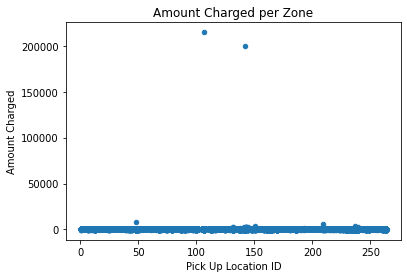

In [6]:
#generating descriptive statistics

processeddf.describe()
#the above plot shows some extreme outliers and has std = 41.81043


plot = processeddf[['PULocationID', 'fare_amount']].plot.scatter(x='PULocationID',y='fare_amount',title='Amount Charged per Zone')
plot.set_xlabel('Pick Up Location ID')
plot.set_ylabel('Amount Charged')

#Shows some astronomically large outliers
plot.get_figure().savefig('../plots/outlier.png')

In [8]:
#reducing 


reduceddf = processeddf.loc[processeddf['total_amount'] < 50000]
#reduceddf.describe()



reduceddf = processeddf.loc[processeddf['total_amount'] < 2000]
reduceddf.describe()


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,5.240500e+07,5.240500e+07,5.240500e+07,5.240500e+07,5.240500e+07,5.240500e+07,5.240500e+07,5.240500e+07,5.240500e+07,5.240500e+07,5.240500e+07,5.240500e+07,5.240500e+07,5.240500e+07
mean,1.575495e+00,1.615832e+00,2.922115e+00,1.032984e+00,1.617663e+02,1.602512e+02,1.308246e+00,1.271419e+01,3.323578e-01,4.980975e-01,1.860133e+00,3.334645e-01,2.997141e-01,1.604154e+01
std,4.945182e-01,1.249578e+00,2.644180e+01,2.571586e-01,6.581140e+01,6.981953e+01,4.790427e-01,1.101167e+01,4.592252e-01,3.612363e-02,2.501703e+00,1.753248e+00,1.290696e-02,1.376368e+01
min,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.850000e+02,-6.000000e+01,-5.000000e-01,-1.010000e+02,-2.150000e+01,-3.000000e-01,-4.858000e+02
25%,1.000000e+00,1.000000e+00,9.800000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.400000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.450000e+00,0.000000e+00,3.000000e-01,1.176000e+01
75%,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.310000e+02,2.330000e+02,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.730000e+01
max,4.000000e+00,1.920000e+02,1.894838e+05,9.900000e+01,2.630000e+02,2.650000e+02,4.000000e+00,1.304740e+03,9.664000e+01,6.080000e+01,4.417100e+02,1.650000e+03,6.000000e-01,1.702800e+03


,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,5.238145e+07,5.238145e+07,5.238145e+07,5.238145e+07,5.238145e+07,5.238145e+07,5.238145e+07,5.238145e+07,5.238145e+07,5.238145e+07,5.238145e+07,5.238145e+07,5.238145e+07,5.238145e+07
mean,1.575304e+00,1.615679e+00,2.923252e+00,1.032955e+00,1.617688e+02,1.602533e+02,1.307355e+00,1.272302e+01,3.326693e-01,4.985435e-01,1.860992e+00,3.335918e-01,2.999836e-01,1.605239e+01
std,4.945474e-01,1.249423e+00,2.644769e+01,2.570215e-01,6.581008e+01,6.981998e+01,4.771986e-01,1.100227e+01,4.589634e-01,2.935013e-02,2.501688e+00,1.738729e+00,2.220943e-03,1.375192e+01
min,1.000000e+00,1.000000e+00,1.000000e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-6.000000e+01,0.000000e+00,0.000000e+00,-6.760000e+00,0.000000e+00,3.000000e-01
25%,1.000000e+00,1.000000e+00,9.800000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.400000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.450000e+00,0.000000e+00,3.000000e-01,1.176000e+01
75%,2.000000e+00,2.000000e+00,3.000000e+00,1.000000e+00,2.310000e+02,2.330000e+02,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.450000e+00,0.000000e+00,3.000000e-01,1.730000e+01
max,4.000000e+00,1.920000e+02,1.894838e+05,9.900000e+01,2.630000e+02,2.650000e+02,4.000000e+00,1.304740e+03,9.664000e+01,6.080000e+01,4.417100e+02,9.808000e+02,6.000000e-01,1.306540e+03


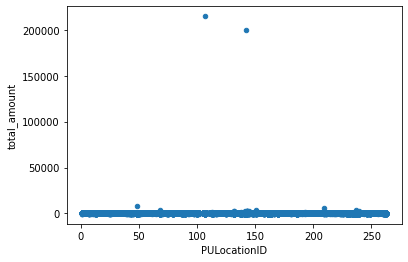

In [9]:

#note that std for total_amount is 42.624
#aim to reduce that

#before outlier removal
processeddf[['PULocationID', 'total_amount']].plot.scatter(x='PULocationID',
                                                  y='total_amount')


#outlier removal
processeddf = processeddf.loc[processeddf['total_amount'] < 1500]

#removing refund trips as that data is not useful in this context

processeddf = processeddf.loc[processeddf['total_amount'] > 0]

processeddf.describe()



In [10]:
#exporting processed data

processeddf.to_csv("../preprocessed data/6monthdata.csv")



Exporting the busiest areas

In [11]:

busiest_areas = processeddf['PULocationID'].value_counts()


busiest_areas = busiest_areas.reset_index()
busiest_areas = pd.DataFrame(busiest_areas)
busiest_areas = busiest_areas.rename(columns={"index": "Pickup Location ID", "PULocationID": "Number of Pickups"})
print(busiest_areas)
busiest_areas.to_csv("../preprocessed data/busiest_locations.csv")



#at some level it would appear like the most profitable area would be 237
#using the mode to determine the most frequent 

     Pickup Location ID  Number of Pickups
0                   237            2210176
1                   161            2080688
2                   236            2021667
3                   162            1871456
4                   230            1820872
..                  ...                ...
256                  44                  7
257                   5                  7
258                 109                  6
259                 110                  2
260                 104                  1

[261 rows x 2 columns]


# Finding Total amount paid per zone

In [13]:
#finding the average total_cost per zone

topids = busiest_areas["Pickup Location ID"].tolist()

toplocations = processeddf.loc[processeddf['PULocationID'].isin(topids)]
#processeddf.loc[processeddf['PULocationID'] == top20ids]



mean_total_amount = toplocations.groupby('PULocationID').mean()['total_amount']




print(mean_total_amount.sort_values(ascending =False ))


PULocationID
1      86.940465
156    75.102444
117    70.279801
154    68.557959
219    63.981292
         ...    
263    12.593243
236    12.278786
141    12.134188
237    11.826596
104     6.800000
Name: total_amount, Length: 261, dtype: float64


RENAME COLUMNS AND MAKE SURE IT WORKS

In [14]:
mean_total_amount

PULocationID
1      86.940465
2      52.496786
3      25.132426
4      14.497248
5      51.811429
         ...    
259    33.631429
260    17.408489
261    19.956425
262    13.229454
263    12.593243
Name: total_amount, Length: 261, dtype: float64

In [15]:
#Reset the df index and then export

mean_total_amount=pd.DataFrame(mean_total_amount)
mean_total_amount = mean_total_amount.reset_index()





In [16]:
print(mean_total_amount)
mean_total_amount.to_csv("../preprocessed data/locationTotalamountMean.csv")

     PULocationID  total_amount
0               1     86.940465
1               2     52.496786
2               3     25.132426
3               4     14.497248
4               5     51.811429
..            ...           ...
256           259     33.631429
257           260     17.408489
258           261     19.956425
259           262     13.229454
260           263     12.593243

[261 rows x 2 columns]
